
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 3</p>
## <p style="text-align: center;">Total points: 85 </p>
## <p style="text-align: center;">Due: October 19, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s)
1. Justin Wagers - jww3243
2. Brett Nesfeder bmn644

# Question 1 - MLP Regressor (15 pts) 
In this question, you will explore the application of Multi-layer Perceptron (MLP) regression using sklearn package in Python; http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html.

The following code will pre-process the data and split the data into training and test sets using train_test_split with random state 30 and test_size = 0.25.

The dataset is loaded from q2_data.csv which contains features of engine and the predictor varialble is "mpg". The features are:
* cylinders 
* displacement
* horsepower
* weight
* acceleration

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import glob
%matplotlib inline


df = pd.read_csv(r"C:\Users\justi\OneDrive\Documents\q2_data.csv") 
df.dropna(inplace=True)
df.columns
y = df['mpg'].values
X = df.drop(['mpg'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=30)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(294, 5) (294,) (98, 5) (98,)


In [2]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130.0,3504,12.0
1,15.0,8,350.0,165.0,3693,11.5
2,18.0,8,318.0,150.0,3436,11.0
3,16.0,8,304.0,150.0,3433,12.0
4,17.0,8,302.0,140.0,3449,10.5


We also want to use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on the original data, we use StandardScaler to center each feature ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Also remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.


   
1) (**5pts**) Now, use the parameters for MLP Regressor as below to train a MLPRegressor models on the entire training set and report the RMSE score for both the trainnig and testing sets (again, use StandardScaler) for the different number of hidden units.

   (a) *hidden_layer_sizes = (5,)* 
   
   (b) *hidden_layer_sizes = (15,)*
   
   (c) *hidden_layer_sizes = (50,)*

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42, batch_size= 20,       learning_rate_init = 0.005
    
   Which of the three models ((a)-(c)) performs the best? Briefly analyze and discuss the results, commenting on the number of hidden units.


2) (**5pts**) MLPRegressor has a built-in attribute *loss\_curve\_* which returns the loss at each epoch (misleadingly referred to as "iteration" in scikit documentation, though they use epoch in the actual code!). For example, if your model is named as *my_model* you can call it as *my\_model.loss\_curve\_* ([example](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py)). Plot three curves using the following three conditions (a, b, c) in one figure, where *X-axis* is epoch  number and *Y-axis* is squared root of *loss\_curve\_*:

   (a) *hidden_layer_sizes = (5,)* 
   
   (b) *hidden_layer_sizes = (15,)*
   
   (c) *hidden_layer_sizes = (50,)* 

   
3) (**5pts**) Now, use the parameters for MLP Regressor as below to train a MLPRegressor models on the entire training set for different batch size. 

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,learning_rate_init = 0.005 , hidden_layer_sizes = (15,)
   
   Plot three different figures for the three batch size, where *X-axis* is epoch  number and *Y-axis* is squared root of *loss\_curve\_*: 

   (a) *batch_size = 1* 
   
   (b) *batch_size = 20*  
   
   (c) *batch_size = 2000* 
     
   **Compare the three plots obtained comment on the gradient updates. What do you understand about the difference between batch_size = 1, 20 and 2000.**

# Answer 1

## Part 1

In [9]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)


In [44]:
from sklearn.metrics import mean_squared_error

regr= MLPRegressor(hidden_layer_sizes = (5,),
                   activation = 'tanh', 
                   solver = 'sgd', 
                   learning_rate='constant', 
                   random_state=42, batch_size= 20, 
                   learning_rate_init = 0.005).fit(X_train, y_train)

lc_5 = regr.loss_curve_

pred = regr.predict(X_train)

print('5 hidden layers:')
print('RMSE (train):', mean_squared_error(y_train, pred, squared= False))

pred = regr.predict(X_test)
print('RMSE (test):', mean_squared_error(y_test, pred, squared= False))

regr= MLPRegressor(hidden_layer_sizes = (15,),
                   activation = 'tanh', 
                   solver = 'sgd', 
                   learning_rate='constant', 
                   random_state=42, batch_size= 20, 
                   learning_rate_init = 0.005).fit(X_train, y_train)
lc_15 = regr.loss_curve_


pred = regr.predict(X_train)

print('15 hidden layers:')
print('RMSE (train):', mean_squared_error(y_train, pred, squared= False))

pred = regr.predict(X_test)
print('RMSE (test):', mean_squared_error(y_test, pred, squared= False))

regr= MLPRegressor(hidden_layer_sizes = (50,),
                   activation = 'tanh', 
                   solver = 'sgd', 
                   learning_rate='constant', 
                   random_state=42, batch_size= 20, 
                   learning_rate_init = 0.005).fit(X_train, y_train)

lc_50 = regr.loss_curve_


pred = regr.predict(X_train)

print('50 hidden layers:')
print('RMSE (train):', mean_squared_error(y_train, pred, squared= False))

pred = regr.predict(X_test)
print('RMSE (test):', mean_squared_error(y_test, pred, squared= False))


5 hidden layers:
RMSE (train): 3.36012895401619
RMSE (test): 4.832776486293581
15 hidden layers:
RMSE (train): 3.0199130137125896
RMSE (test): 4.600134970896509
50 hidden layers:
RMSE (train): 2.9409641541118186
RMSE (test): 4.769185342700967


We can see that the MLP with the lowest test RMSE is the one with 15 hidden layers. The MLP with 50 hidden layers shows signs of overfitting, as it has a lower train RMSE but a higher test RMSE. 

## Part 2

In [ ]:
lc_5=np.sqrt(lc_5)
lc_15= np.sqrt(lc_15)
lc_50 = np.sqrt(lc_50)

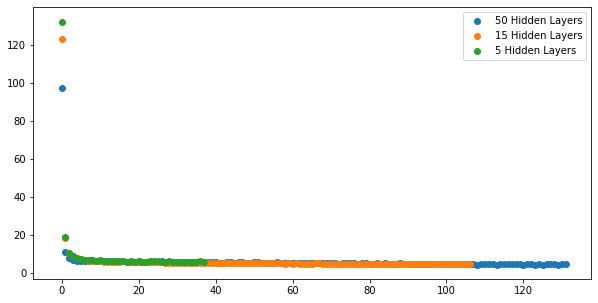

In [46]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.scatter(range(len(lc_50)), lc_50, label = '50 Hidden Layers')
plt.scatter(range(len(lc_15)), lc_15, label = '15 Hidden Layers')
plt.scatter(range(len(lc_5)), lc_5, label = '5 Hidden Layers')
# plt.plot(x_all,y_pred,color='r', label = 'linear regression prediction on x_all')

# plt.scatter(x_test,y_test,color=['red'], label = 'test points')
# plt.scatter(x_train,y_train, color =['blue'], label = 'training points')
plt.legend(loc='upper right')
plt.show()

## Part 3

In [47]:
regr= MLPRegressor(activation = 'tanh', 
                   solver = 'sgd', 
                   learning_rate='constant', 
                   random_state=42,learning_rate_init = 0.005 , 
                   batch_size = 1,
                   hidden_layer_sizes = (15,)).fit(X_train, y_train)

batch_1 = regr.loss_curve_

pred = regr.predict(X_train)

print('5 hidden layers:')
print('RMSE (train):', mean_squared_error(y_train, pred, squared= False))

pred = regr.predict(X_test)
print('RMSE (test):', mean_squared_error(y_test, pred, squared= False))

regr= MLPRegressor(activation = 'tanh', 
                   solver = 'sgd', 
                   learning_rate='constant', 
                   random_state=42,learning_rate_init = 0.005 , 
                   batch_size = 20,
                   hidden_layer_sizes = (15,)).fit(X_train, y_train)

batch_20 = regr.loss_curve_


pred = regr.predict(X_train)

print('15 hidden layers:')
print('RMSE (train):', mean_squared_error(y_train, pred, squared= False))

pred = regr.predict(X_test)
print('RMSE (test):', mean_squared_error(y_test, pred, squared= False))

regr= MLPRegressor(activation = 'tanh', 
                   solver = 'sgd', 
                   learning_rate='constant', 
                   random_state=42,learning_rate_init = 0.005 , 
                   batch_size = 2000,
                   hidden_layer_sizes = (15,)).fit(X_train, y_train)


batch_2000= regr.loss_curve_


pred = regr.predict(X_train)

print('50 hidden layers:')
print('RMSE (train):', mean_squared_error(y_train, pred, squared= False))

pred = regr.predict(X_test)
print('RMSE (test):', mean_squared_error(y_test, pred, squared= False))

5 hidden layers:
RMSE (train): 5.089400301148969
RMSE (test): 6.576778538636723
15 hidden layers:
RMSE (train): 3.0199130137125896
RMSE (test): 4.600134970896509
50 hidden layers:
RMSE (train): 4.691211182968425
RMSE (test): 5.654852738174993


C:\Users\justi\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:352: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


In [48]:
batch_1 = np.sqrt(batch_1)
batch_20 = np.sqrt(batch_20)
batch_2000= np.sqrt(batch_2000)

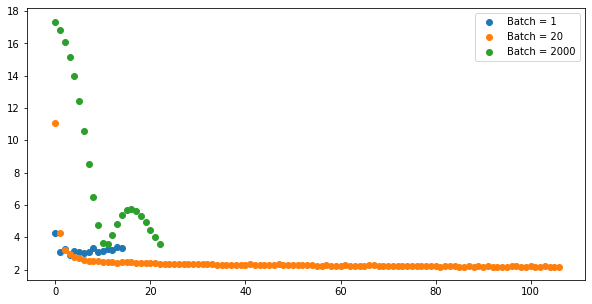

In [49]:
plt.figure(figsize=(10,5))
plt.scatter(range(len(batch_1)), batch_1, label = 'Batch = 1')
plt.scatter(range(len(batch_20)), batch_20, label = 'Batch = 20')
plt.scatter(range(len(batch_2000)), batch_2000, label = 'Batch = 2000')
# plt.plot(x_all,y_pred,color='r', label = 'linear regression prediction on x_all')

# plt.scatter(x_test,y_test,color=['red'], label = 'test points')
# plt.scatter(x_train,y_train, color =['blue'], label = 'training points')
plt.legend(loc='upper right')
plt.show()

We can see that when batch =1, the gradient update is too slow, and we never reach a good minimum on our loss curve. However, when batch = 2000 the gradient update is overshooting. With a batch size of 20 we seem to achieve the most balanced gradient update to find the minimum value of our loss curve. 

# Question 2: Tensor Playground (15 points)
Visit https://playground.tensorflow.org for this problem

From the far right, select "Classification" as the problem type, and select the data set on the top right (alternate colored squares).

Use these settings as the DEFAULT settings for all subquestions: test/training ratio = 50%, Noise = 0, Batch Size = 30, learning rate = 0.03, activation = tanh, one hidden layer with 2 neurons, input as $X_1$, $X_2$ and no Regularization.

1) Use the DEFAULT setting and run two experiments - one using Tanh as the activation function and one using the linear activation function. Report the train, test losses for both these experiments at the end of 1000 epochs. What qualitative difference do you observe in the decision boundaries obtained? Why? (**4 pts**)

We will now study the effect of certain variations in the network structure or training, keeping all other aspects the same as in the default configuration specified above, and with tanh as the activation for hidden units.

2) Effect of number of hidden units: Go back to DEFAULT settings and report the train, test losses at the end of 1000 epochs for 4 and 8 neurons in the hidden layer (2 pairs of results). What do you observe regarding the decision boundary as the number of neurons increases? Why? (**4 pts**)

3) Effect of learning rate and number of epochs: Go back to DEFAULT settings and set the activation to be Relu and have four neurons in the hidden layer. Report the train, test losses at the end of 100 epochs and 1000 epochs for learning rates of 10, 0.1, 0.01 and 0.001 (8 pairs of results). What do you observe in the loss curves? Explain. (**4 pts**)

4) Go back to DEFAULT settings. Play around with any of the other hyperparameters, network architectures and input features (such as $\sin(X_1), X_1^2$ etc.) and report the best train/test loss you could get (test loss should be at most 0.06). Attach the screenshot from Tensor playground for the same (show your full network, output and parameters). Briefly justify your decisions, and comment on difficulties/tradeoffs, what helps/what doesn't,etc. (**3 pts**)

# Answer 2

## 1. 
Tahn Test Loss: 0.169

Tahn Training Loss: 0.121

Linear Test Loss: 0.493

Linear Training Loss: 0.495

The decision boundary for the Tahn function shifts dramatically early, but eventually stalibizes into a very wide parabola shape. The decision boundary for the Linear function was extremely stable from the start since it essentially splits the points into 50/50. This happens because Tahn, a nonlinear transformative function, has to be used to create nonlinear boundaries. 

## 2. 
4 Neuron Test Loss: 0.029

4 Neuron Training Loss: 0.013

8 Neuron Test Loss: 0.021

8 Neuron Training Loss: 0.006

Additional neurons make a decision boundary more flexible because more neurons increases the complexity of the model which makes fitting the training data have very clear boundaries. So in this case, the 8 Neuron model would classify the points with more certainty. 


## 3. 


100 Epochs:

* Learning Rate = 10
 * Train Loss: 0.472
 * Test Loss: 0.467

* Learning Rate = 0.1
 * Train Loss: 0.003 
 * Test Loss: 0.005
 
* Learning Rate = 0.01
 * Train Loss: 0.035
 * Test Loss: 0.046
 
* Learning Rate = 0.001
 * Train Loss: 0.314
 * Test Loss: 0.324
 
1000 Epochs:

* Learning Rate = 10
 * Train Loss: 0.432
 * Test Loss: 0.409
 
* Learning Rate = 0.1
 * Train Loss: 0.001
 * Test Loss: 0.005
 
* Learning Rate = 0.01
 * Train Loss = 0.004
 * Test Loss = 0.010
 
* Learning Rate = 0.001
 * Train Loss: 0.084
 * Test Loss: 0.094
 

The loss curves do the most fluctuation throughout the first 100 epochs for all of the learning rates. Also, all of the train / test losses decrease for all learning rates, some more rapidly than others, throughout the epochs besides learning rate = 10 which increases immediately and then stabilizes and stays the same through the rest of the epochs. This difference for learning rate = 10 is because at first the model would diverge by overestimating local minima while updating the weights, differing from the other learning rates.

## 4. 

The model that gave us the best train / test loss included all of the default settings, but with X1X2 as an additional feature and Linear as the activation function. Adding X1X2 to the model occurred because X1 and X2 are dependent and multicollinear as seen from visuals. Also, through trial and error, adding X1X2 gave the lowest loss results whether the activation function was Tahn or Linear. Including the original X1 and X2 accounts for some possible test points that may be very close to various clusters and in this way, helps clean those details. 



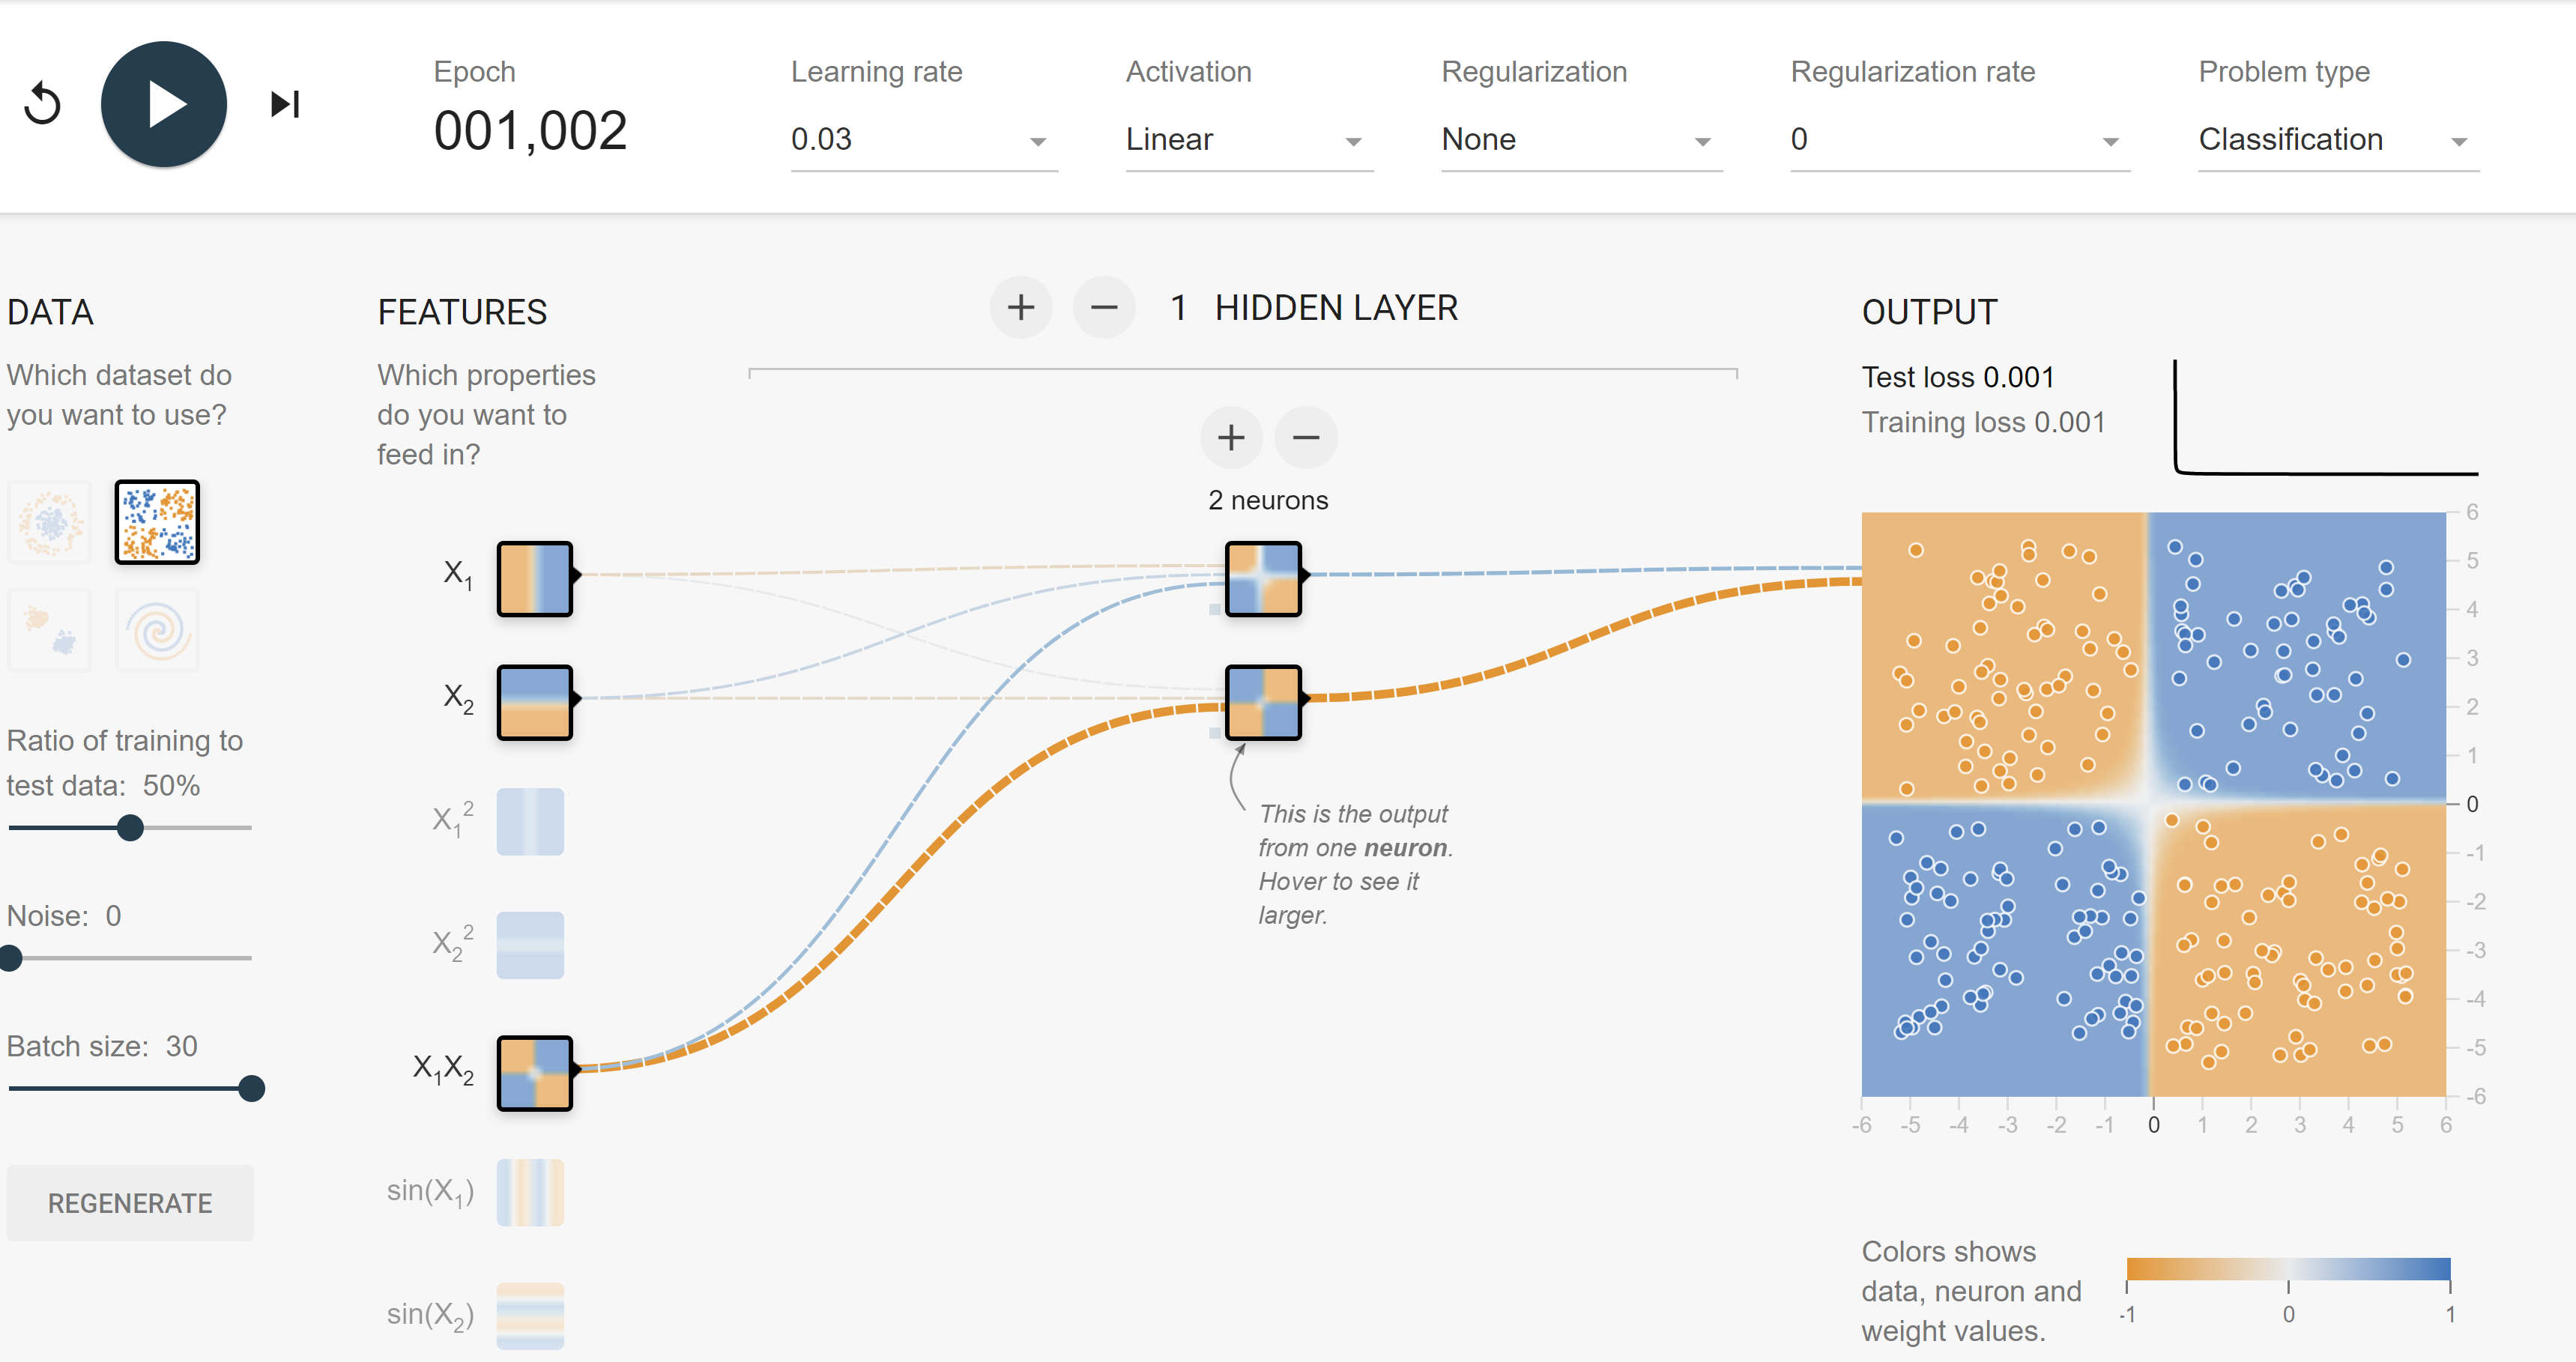

In [78]:
from IPython.display import Image
Image(filename='apm hw3 q2.png')

# Question 3 - Feature Selection (20 pts)

In this question, we will explore the importance of feature selection, You can use the below code to load the dataset "zoo.csv". This dataset contains a set of features for different animals and the output is class_type 
corresponding to the features. The details of class_type is present in class.csv for your reference.

1. Plot the correlation matrix. The resulting correlation plot should be (n_features * n_features) matrix. List the top 5 most positively correlated features with class_type. (**3pts**)

2. List the top 5 most negatively correlated features with class_type. (**3pts**)

3. Use https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE to perform feature selection with estimator = LogisticRegression(max_iter=1000) estimator. List the top 5 features selected from RFE.(**2pts**)

* Create a train_test split of 80:20(train:test) with random state = 50

* We need to use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on the original data, we use StandardScaler to center each feature ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Also remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.

4. Train a MLP Regressor with train data and report the ${R^2}$ score on the test set for each of the following, 

   a) Model trained with top 5 most positvely correlated features from part 1
   
   b) Model trained with top 5 most negatively correlated features from part 2
   
   c) Model trained with five features selected by RFE from part 3
   
   d) Finally train a MLP Regressor on the entire training data with the entire orignal features.Use the default values for MLPRegressor as below(**8pts**)

    MLPRegressor(max_iter = 1000,random_state=1)

5. Explain your results based on your understanding of feature selection and the ${R^2}$ score.  (**4pts**) 

In [69]:
df_zoo = pd.read_csv(r"C:\Users\justi\OneDrive\Documents\zoo.csv") 
df_zoo.columns
y = df_zoo['class_type'].values
X = df_zoo.drop(['class_type','animal_name'], axis = 1)

df_class = pd.read_csv(r"C:\Users\justi\OneDrive\Documents\class.csv") 

In [70]:
df_zoo_new = df_zoo

df_zoo_new['class_new'] = np.where(df_zoo['class_type']>=6, 0, 1)

del df_zoo_new['class_type']


# Answer 3

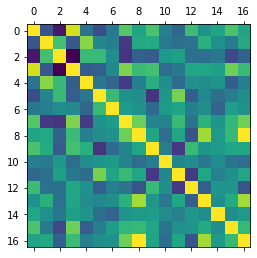

Most highly correlated features with class_type:


backbone    1.000000
tail        0.731762
toothed     0.575085
milk        0.384958
catsize     0.356976
Name: class_new, dtype: float64

In [71]:
import matplotlib.pyplot as plt

plt.matshow(df_zoo_new.corr())
plt.show()

print('Most highly correlated features with class_type:')
var_1 = df_zoo_new.corr().class_new.sort_values(ascending = False)[1:6]
var_1

In [72]:
print('Most negatively correlated features with class_type:')
var_2 = df_zoo_new.corr().class_new.sort_values(ascending = True)[:5]
var_2

Most negatively correlated features with class_type:


legs       -0.432856
eggs       -0.340420
venomous   -0.246611
airborne   -0.104718
aquatic     0.022463
Name: class_new, dtype: float64

In [73]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression(max_iter=1000)
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
selector.support_
selector.ranking_

var_3 = []
for i in range(len(X.columns)):
    if selector.ranking_[i] == 1:
        var_3.append(X.columns[i])
var_3

['feathers', 'milk', 'toothed', 'backbone', 'breathes']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state=50)

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)

scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)


In [76]:
var_1 = var_1.index.values.tolist()
var_2 = var_2.index.values.tolist()

In [77]:
from sklearn.metrics import r2_score

X_train_1 = X_train_scaled[var_1]
X_test_1 = X_test_scaled[var_1]

X_train_2 = X_train_scaled[var_2]
X_test_2 = X_test_scaled[var_2]

X_train_3 = X_train_scaled[var_3]
X_test_3 = X_test_scaled[var_3]

regr= MLPRegressor(max_iter = 1000,random_state=1).fit(X_train_1, y_train)
pred = regr.predict(X_test_1)
print('R^2 (5 positively correlated features):', r2_score(y_test, pred))

regr= MLPRegressor(max_iter = 1000,random_state=1).fit(X_train_2, y_train)
pred = regr.predict(X_test_2)
print('R^2 (5 negatively correlated features):', r2_score(y_test, pred))

regr= MLPRegressor(max_iter = 1000,random_state=1).fit(X_train_3, y_train)
pred = regr.predict(X_test_3)
print('R^2 (5 negatively correlated features):', r2_score(y_test, pred))

regr= MLPRegressor(max_iter = 1000,random_state=1).fit(X_train, y_train)
pred = regr.predict(X_test)
print('R^2 (full model):', r2_score(y_test, pred))


R^2 (5 positively correlated features): 0.6353423982478139
R^2 (5 negatively correlated features): 0.5932277770130138
R^2 (5 negatively correlated features): 0.7256081417296787
R^2 (full model): 0.9741386471077164


We can see that depending on the method of feature selection for our MLP model, we get varying goodness of fit. With all of the features included in the model, our R^2 value indicates that our model explains more than 97% of the variation in the test data. However, the feature selection through RFE (recursive feature elimination) gives us a model that is nearly as good, with the R^2 indincating that the model explains 95.7% of the variation in the data. The models where we chose features based on positive/negative correlation seemed to have the worst fit, explaining only 75% and 85% of the variation in the data, respectively. 

# Question 4 (Data Pre-processing - 25pts)
The following dataset contains House Sales data in King County, USA. This dataset contains house sale prices for King County, which includes Seattle. This dataset contains the following columns:

* bedrooms: Number of Bedrooms/House
* bathrooms: Number of bathrooms/bedrooms
* sqft_living: Square footage of the home
* sqft_lot: Square footage of the lot
* floors: Total floors (levels) in house
* waterfront: House which has a view to a waterfront (0/1)
* view: Has been viewed (0-4)
* condition: How good the condition is Overall (1-5)
* grade: Overall grade given to the housing unit, based on King County grading system (1-13)
* sqft_above: Square footage of house apart from basement
* sqft_basement: Square footage of the basement
* yr_built: Built Year
* yr_renovated: Year when house was renovated
* zipcode: Zip code
* price: Selling price of house

Here, price is the dependent variable while all other variables are assumed to be independent variables. Here, 10% cells of most columns in the dataset contain NaN value.

In [3]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

np.random.seed(100)

df = pd.read_csv(r"C:\Users\justi\OneDrive\Documents\kc_house_data.csv") 
age = df['yr_renovated']
built = df['yr_built']
df.iloc[:, :-1] = df[:-1].mask(np.random.random(df[:-1].shape)<0.1)
df['yr_renovated'] = age
df['yr_built'] = built
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price
0,3.0,1.00,1180.0,5650.0,NaN,0.0,0.0,3.0,7.0,1180.0,0.0,1955,0,98178.0,221900.0
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951,1991,98125.0,538000.0
2,2.0,1.00,770.0,10000.0,NaN,0.0,0.0,NaN,6.0,770.0,0.0,1933,0,NaN,180000.0
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965,0,NaN,604000.0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987,0,98074.0,510000.0


### Question 4.1 (5 points)
Print the number of NaN values in each column. Next, if the value of `yr_renovated` is equal to 0, set it equal to the corresponding value of `yr_built`.

In [4]:
#NaN value counts
print(df.isna().sum())

#If yr_renovated = 0, then it equals yr_built value
df['yr_renovated'] = np.where(df['yr_renovated'] == 0, df['yr_built'], df['yr_renovated'])
df.head()

bedrooms         2150
bathrooms        2150
sqft_living      2170
sqft_lot         2091
floors           2152
waterfront       2179
view             2184
condition        2096
grade            2135
sqft_above       2163
sqft_basement    2198
yr_built            0
yr_renovated        0
zipcode          2169
price               0
dtype: int64


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price
0,3.0,1.00,1180.0,5650.0,NaN,0.0,0.0,3.0,7.0,1180.0,0.0,1955,1955,98178.0,221900.0
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951,1991,98125.0,538000.0
2,2.0,1.00,770.0,10000.0,NaN,0.0,0.0,NaN,6.0,770.0,0.0,1933,1933,NaN,180000.0
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965,1965,NaN,604000.0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987,1987,98074.0,510000.0


### Question 4.2 (6 points)

Create a copy of `df` named `df_dm` and create a new column in `df_dm` named `binned_yr_built` and apply binning to the column `yr_built`. Use [pandas.cut()](https://stackoverflow.com/a/31740881) and modify its paramter list as below:
- `bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020]`
- `labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']`
- `include_lowest=True`

Next, perform one-hot encoding using this new column.

In [5]:
df_dm = df.copy()
df_dm['binned_yr_built'] = pd.cut(df['yr_built'], [1900, 1920, 1940, 1960, 1980, 2000, 2020], 
                                  labels = ['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020'], include_lowest = True)

y = pd.get_dummies(df_dm['binned_yr_built'])
print(y.head())

   1900-1920  1920-1940  1940-1960  1960-1980  1980-2000  2000-2020
0          0          0          1          0          0          0
1          0          0          1          0          0          0
2          0          1          0          0          0          0
3          0          0          0          1          0          0
4          0          0          0          0          1          0


## Question 4.3 (4 points)
Create a copy of `df` named `temp_df`. Drop all rows in `temp_df` that contain any null value and run a linear regression model using a train-test split with `test_size=0.3` and `random_state=42`.

In [6]:
temp_df = df.copy()
temp_df = temp_df.dropna()

X = temp_df.drop(['price'], axis = 1)
Y = temp_df['price'].values

from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X, Y)
print('Coefficients:', reg.coef_)

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

x_tr, x_te, y_tr, y_te = train_test_split(X, Y, test_size = 0.3, random_state = 42)

model = reg.fit(x_tr, y_tr)
predictions = model.predict(x_tr)

print('R^2 score (train):', r2_score(y_tr, predictions))

testpredictions = model.predict(x_te)
print('R^2 score (test):', r2_score(y_te, testpredictions))

Coefficients: [-3.40095759e+04  5.47392563e+04  1.04726528e+02 -1.21114967e-01
  2.83594691e+04  6.85771244e+05  3.81306884e+04  1.95954672e+04
  1.22841592e+05  5.01364198e+01  5.45901084e+01 -4.07019517e+03
  3.77015827e+02  2.46281331e+01]
R^2 score (train): 0.6727910381524023
R^2 score (test): 0.6683819021913122


## Question 4.4 (8 points)

Use `df` to create a train/test split with `test_size=0.30` and `random_state=42`. Use the following imputation methods to fill in all NaN values for the obtained training set.
- mean (using [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer))
- median (using [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer))
- most_frequent (using [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer))
- k-Nearest Neighbors (using [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer)) - Run this four times with the value of `n_neighbors` = 2, 5, 10 and 20.

For each method, impute the test set with the same imputer and print the test $R^2$ score obtained using a linear regression model. Which method gives the best result? What can you say from the result of a) SimpleImputer and b) KNNImputer?

In [7]:
X = df.drop(['price'], axis = 1)
Y = df['price'].values


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

x_tr, x_te, y_tr, y_te = train_test_split(X, Y, test_size = 0.3, random_state = 42)

#using mean 
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imp_mean.fit(x_tr, y_tr)
x_tr_mean = imp_mean.transform(x_tr)
x_te_mean = imp_mean.transform(x_te)

model_mean = reg.fit(x_tr_mean, y_tr)
predictions_mean = model_mean.predict(x_tr_mean)

print('R^2 score (train) using mean:', r2_score(y_tr, predictions_mean))

testpredictions_mean = model_mean.predict(x_te_mean)
print('R^2 score (test) using mean:', r2_score(y_te, testpredictions_mean))

#using median 
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(missing_values = np.nan, strategy = 'median')
imp_median.fit(x_tr, y_tr)
x_tr_median = imp_median.transform(x_tr)
x_te_median = imp_median.transform(x_te)

model_median = reg.fit(x_tr_median, y_tr)
predictions_median = model.predict(x_tr_median)

print('R^2 score (train) using median:', r2_score(y_tr, predictions_median))

testpredictions_median = model_median.predict(x_te_median)
print('R^2 score (test) using median:', r2_score(y_te, testpredictions_median))

#using most frequently 
from sklearn.impute import SimpleImputer
imp_mf = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imp_mf.fit(x_tr, y_tr)
x_tr_mf = imp_mf.transform(x_tr)
x_te_mf = imp_mf.transform(x_te)

model_mf = reg.fit(x_tr_mf, y_tr)
predictions_mf = model_mf.predict(x_tr_mf)

print('R^2 score (train) using most_frequent:', r2_score(y_tr, predictions_mf))

testpredictions_mf = model_mf.predict(x_te_mf)
print('R^2 score (test) using most_frequent:', r2_score(y_te, testpredictions_mf))


R^2 score (train) using mean: 0.6234678747736729
R^2 score (test) using mean: 0.628553308230076
R^2 score (train) using median: 0.6178098435682151
R^2 score (test) using median: 0.6229831308641851
R^2 score (train) using most_frequent: 0.6113087156894423
R^2 score (test) using most_frequent: 0.6180421246582086


In [8]:
#using KNN = 2 
from sklearn.impute import KNNImputer
imp_knn2 = KNNImputer(n_neighbors = 2)
imp_knn2.fit(x_tr, y_tr)
x_tr_knn2 = imp_knn2.transform(x_tr)
x_te_knn2 = imp_knn2.transform(x_te)

model_knn2 = reg.fit(x_tr_knn2, y_tr)
predictions_knn2 = model_knn2.predict(x_tr_knn2)

print('R^2 score (train) using knn = 2:', r2_score(y_tr, predictions_knn2))

testpredictions_knn2 = model_knn2.predict(x_te_knn2)
print('R^2 score (test) using knn = 2:', r2_score(y_te, testpredictions_knn2))

R^2 score (train) using knn = 2: 0.622517087195918
R^2 score (test) using knn = 2: 0.6245555494882622


In [9]:
#using KNN = 5
imp_knn5 = KNNImputer(n_neighbors = 5)
imp_knn5.fit(x_tr, y_tr)
x_tr_knn5 = imp_knn5.transform(x_tr)
x_te_knn5 = imp_knn5.transform(x_te)

model_knn5 = reg.fit(x_tr_knn5, y_tr)
predictions_knn5 = model_knn5.predict(x_tr_knn5)

print('R^2 score (train) using knn = 5:', r2_score(y_tr, predictions_knn5))

testpredictions_knn5 = model_knn5.predict(x_te_knn5)
print('R^2 score (test) using knn = 5:', r2_score(y_te, testpredictions_knn5))


R^2 score (train) using knn = 5: 0.6288540989391769
R^2 score (test) using knn = 5: 0.6324863425240902


In [10]:
#using KNN = 10
imp_knn10 = KNNImputer(n_neighbors = 10)
imp_knn10.fit(x_tr, y_tr)
x_tr_knn10 = imp_knn10.transform(x_tr)
x_te_knn10 = imp_knn10.transform(x_te)

model_knn10 = reg.fit(x_tr_knn10, y_tr)
predictions_knn10 = model_knn10.predict(x_tr_knn10)

print('R^2 score (train) using knn = 10:', r2_score(y_tr, predictions_knn10))

testpredictions_knn10 = model_knn10.predict(x_te_knn10)
print('R^2 score (test) using knn = 10:', r2_score(y_te, testpredictions_knn10))


R^2 score (train) using knn = 10: 0.6311439012100459
R^2 score (test) using knn = 10: 0.6351647527597303


In [11]:
#using KNN = 20
imp_knn20 = KNNImputer(n_neighbors = 20)
imp_knn20.fit(x_tr, y_tr)
x_tr_knn20 = imp_knn20.transform(x_tr)
x_te_knn20 = imp_knn20.transform(x_te)

model_knn20 = reg.fit(x_tr_knn20, y_tr)
predictions_knn20 = model_knn20.predict(x_tr_knn20)

print('R^2 score (train) using knn = 20:', r2_score(y_tr, predictions_knn20))

testpredictions_knn20 = model_knn20.predict(x_te_knn20)
print('R^2 score (test) using knn = 20:', r2_score(y_te, testpredictions_knn20))


R^2 score (train) using knn = 20: 0.6326862182577824
R^2 score (test) using knn = 20: 0.6366366234931953


## Question 4.5 (2 points)
In Questions 4.3 and 4.4, when you dropped all rows containing any null value, you obtained better $R^2$ score than when you imputed the missing values. What can be some possible reasons behind this?

This could be because there aren't enough rows with missing values to negatively effect the R sqaured score by dropping these rows. Therefore, dropping them would be better than filling them in with an imputed value. While this could be true, the scores are lower, but not by much.

# Question 5: Supplementary Notes (10 points)
Visit the [Supplementary Notes website](https://ideal-ut.github.io/APM-2020/). Read the notes written by your peers from both sections (first 6 topics/lectures only, i.e. up to "gradient descent"). Select the note that you liked the most and write the following:
- Identify the note. (e.g., If you liked the note from Section A for topic 1, write 1A).
- Write one-two paragraphs on why you liked your selection the most and what you learnt from it.
- Also write a short paragraph on how you think this note can be further improved.

Note 5B: Bias-Variance Dilemma (Section B)
    
We thought Zach, Mac, and Nicole did a great job on this supplementary note. Understanding the difference and interaction between bias and variance is an essential component to machine learning in general, and they did a great job at laying this groundwork. First they went into good depth on the bias-variance decomposition, giving an intuitive high-level description of how each contributes to overall error. They also provided a great graphic to portray the difference between the two. They followed this with a succinct discussion of the bias-variance tradeoff and how one would go about improving a model. We liked the way they set 4 clear methods to reduce a model's test error - more training data, change the complexity of the model, change the optimization method, and change the model type. Their brief discussion of feature engineering was a nice insight into a topic we would explore later in the class. 

The only suggestion we would make to this team would be to expand the discusssion of the effect of regularization on bias and variance. They might try to explain this effect in a more intuitive way, and it could be aided through the inclusion of a graphic that depicts changes in bias and variance as the regularization term changes. 

Overall, this group did a great job at presenting the bias-variance tradeoff in a clear manner. Their writing was comprehensive but to the point, and their choice of visuals was strong. Nice job. 